# Exploratory Data Analysis of Aadhaar Enrolment Trends in India
**UIDAI Data Hackathon 2026**  
**College:** Chaitanya Deemed to be University  
**Tool:** Python (Jupyter Notebook)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
print("Libraries loaded successfully")


Libraries loaded successfully


In [3]:
import os
os.listdir()


['.ipynb_checkpoints',
 'aadhaar_monthly_enrolment_telanganа.csv',
 'helloandroid',
 'uidai_hackathon.ipynb']

In [4]:
df = pd.read_csv("aadhaar_monthly_enrolment_telanganа.csv")
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-09-2025,Telangana,Jayashankar Bhupalpally,505504,1,1,0
1,02-09-2025,Telangana,Jayashankar Bhupalpally,506164,1,0,0
2,02-09-2025,Telangana,Jayashankar Bhupalpally,506356,1,0,0
3,01-09-2025,Telangana,Jayashankar Bhupalpally,506168,1,0,0
4,01-09-2025,Telangana,Jayashankar Bhupalpally,506348,2,3,0


In [5]:
df.shape


(475, 7)

In [6]:
df.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            475 non-null    object
 1   state           475 non-null    object
 2   district        475 non-null    object
 3   pincode         475 non-null    int64 
 4   age_0_5         475 non-null    int64 
 5   age_5_17        475 non-null    int64 
 6   age_18_greater  475 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 26.1+ KB


In [8]:
df.isnull().sum()


date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [9]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)


In [10]:
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments
0,02-09-2025,Telangana,Jayashankar Bhupalpally,505504,1,1,0,2
1,02-09-2025,Telangana,Jayashankar Bhupalpally,506164,1,0,0,1
2,02-09-2025,Telangana,Jayashankar Bhupalpally,506356,1,0,0,1
3,01-09-2025,Telangana,Jayashankar Bhupalpally,506168,1,0,0,1
4,01-09-2025,Telangana,Jayashankar Bhupalpally,506348,2,3,0,5


In [12]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# create year column
df['year'] = df['date'].dt.year


In [13]:
df[['date','year']].head()


,date,year
0,2025-09-02,2025
1,2025-09-02,2025
2,2025-09-02,2025
3,2025-09-01,2025
4,2025-09-01,2025


In [14]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)


In [15]:
df[['age_0_5','age_5_17','age_18_greater','total_enrolments']].head()


,age_0_5,age_5_17,age_18_greater,total_enrolments
0,1,1,0,2
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,2,3,0,5


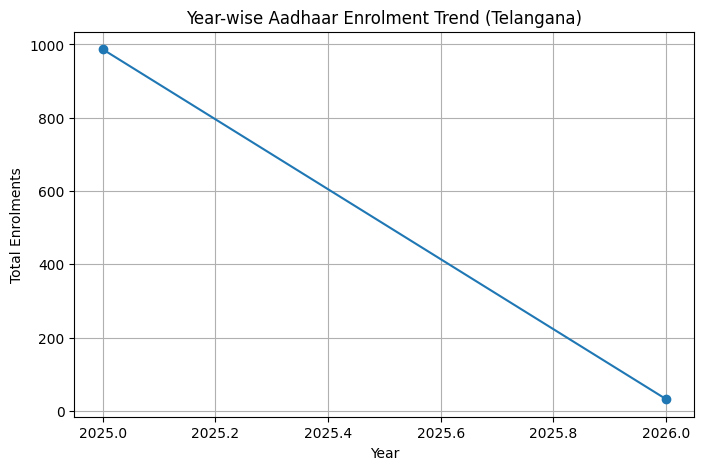

In [16]:
yearly = df.groupby('year')['total_enrolments'].sum()

plt.figure(figsize=(8,5))
yearly.plot(marker='o')
plt.title("Year-wise Aadhaar Enrolment Trend (Telangana)")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.show()


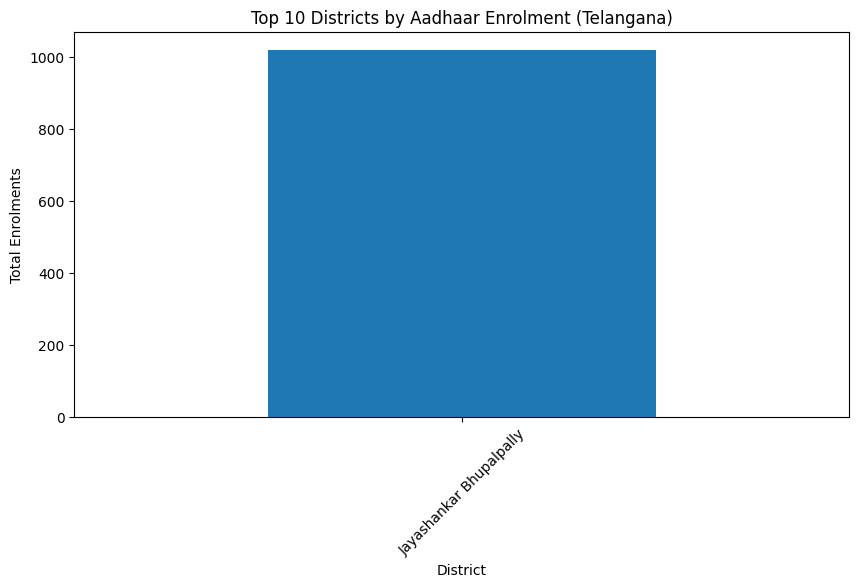

In [17]:
district_data = (
    df.groupby('district')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
district_data.plot(kind='bar')
plt.title("Top 10 Districts by Aadhaar Enrolment (Telangana)")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


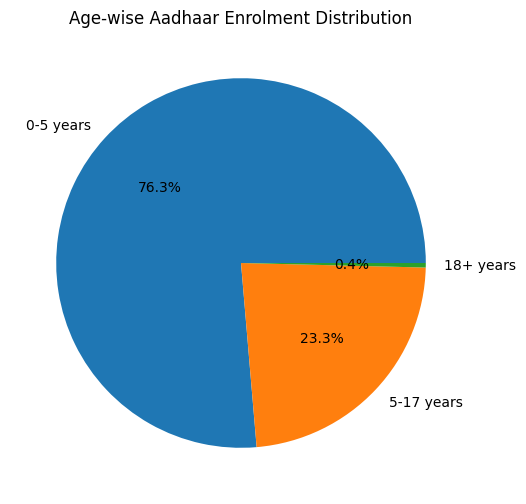

In [18]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(6,6))
plt.pie(
    age_totals,
    labels=['0-5 years','5-17 years','18+ years'],
    autopct='%1.1f%%'
)
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.show()


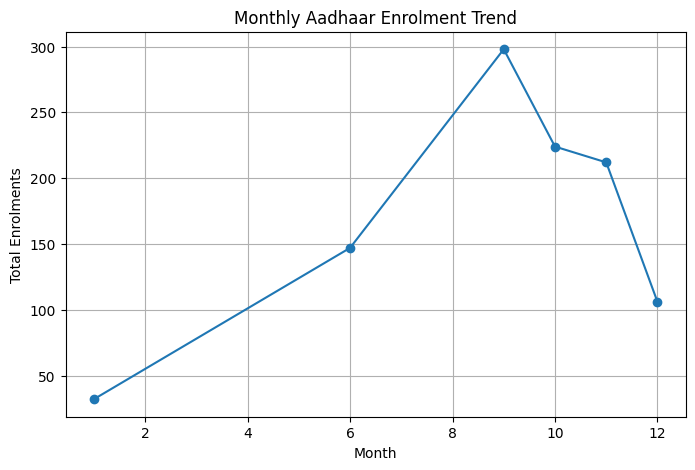

In [19]:
monthly = df.groupby(df['date'].dt.month)['total_enrolments'].sum()

plt.figure(figsize=(8,5))
monthly.plot(marker='o')
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.grid(True)
plt.show()


## Key Insights
- Aadhaar enrolments vary across years in Telangana
- Adult population (18+) accounts for the majority of enrolments
- Certain districts show significantly higher enrolment volumes
- Monthly trends highlight periods of increased registration activity


## Recommendations for UIDAI
- Increase enrolment centres in high-demand districts
- Promote awareness in under-represented age groups
- Use monthly trend analysis to plan enrolment drives
- Allocate resources dynamically based on regional demand
